In [133]:
#Import a file by using pandas
import yfinance as yf
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt 
import numpy as np 

In [134]:
sp500 = yf.Ticker("^GSPC")
sp500 = sp500.history(period="max")
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-05-09 00:00:00-04:00,5189.029785,5215.299805,5180.410156,5214.080078,3727370000,0.0,0.0
2024-05-10 00:00:00-04:00,5225.490234,5239.660156,5209.680176,5222.680176,3617900000,0.0,0.0
2024-05-13 00:00:00-04:00,5233.080078,5237.259766,5211.160156,5221.419922,4255710000,0.0,0.0


In [135]:
sp500.index = pd.to_datetime(sp500.index)
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2024-05-02 00:00:00-04:00', '2024-05-03 00:00:00-04:00',
               '2024-05-06 00:00:00-04:00', '2024-05-07 00:00:00-04:00',
               '2024-05-08 00:00:00-04:00', '2024-05-09 00:00:00-04:00',
               '2024-05-10 00:00:00-04:00', '2024-05-13 00:00:00-04:00',
               '2024-05-14 00:00:00-04:00', '2024-05-15 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24209, freq=None)

<Axes: xlabel='Date'>

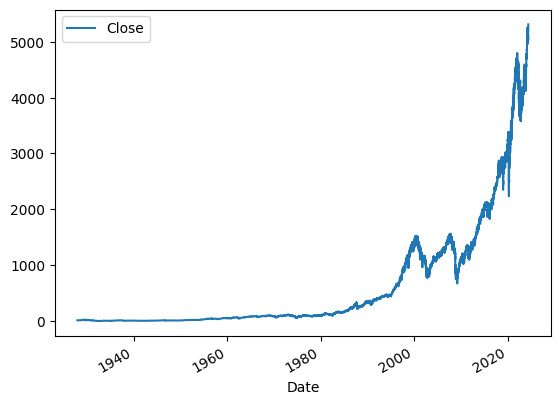

In [136]:
import matplotlib.pyplot as plt 

#Visualising stock data
sp500.plot.line(y="Close", use_index = True)

In [137]:
#Data cleaning
del sp500["Dividends"]
del sp500["Stock Splits"]

In [138]:
#Setting up the target for machine learning
sp500["Tomorrow"] = sp500["Close"].shift(-1)
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2024-05-09 00:00:00-04:00,5189.029785,5215.299805,5180.410156,5214.080078,3727370000,5222.680176
2024-05-10 00:00:00-04:00,5225.490234,5239.660156,5209.680176,5222.680176,3617900000,5221.419922
2024-05-13 00:00:00-04:00,5233.080078,5237.259766,5211.160156,5221.419922,4255710000,5246.680176


In [139]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [140]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2024-05-09 00:00:00-04:00,5189.029785,5215.299805,5180.410156,5214.080078,3727370000,5222.680176,1
2024-05-10 00:00:00-04:00,5225.490234,5239.660156,5209.680176,5222.680176,3617900000,5221.419922,0
2024-05-13 00:00:00-04:00,5233.080078,5237.259766,5211.160156,5221.419922,4255710000,5246.680176,1


In [141]:
#With the stock market data if you go back too far the market could have shifted fundamentally
#So delete some of that old data before 1990-01-02
sp500 = sp500.loc["1990-01-01":].copy()

In [142]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2024-05-09 00:00:00-04:00,5189.029785,5215.299805,5180.410156,5214.080078,3727370000,5222.680176,1
2024-05-10 00:00:00-04:00,5225.490234,5239.660156,5209.680176,5222.680176,3617900000,5221.419922,0
2024-05-13 00:00:00-04:00,5233.080078,5237.259766,5211.160156,5221.419922,4255710000,5246.680176,1


In [147]:
print(train["Target"].value_counts())
print(test["Target"].value_counts())

Target
1    4576
0    3983
Name: count, dtype: int64
Target
1    55
0    45
Name: count, dtype: int64


In [148]:
#Training an initial machine learning 
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [153]:
#Measure the accuracy in the model
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["Target"], preds)

/Users/justinlee/Desktop/data_prediction_pj/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


0.0

<Axes: xlabel='Date'>

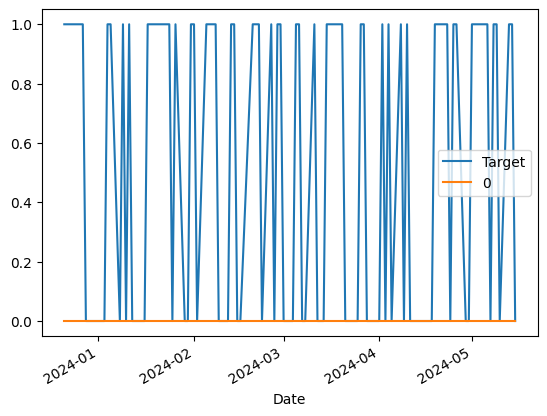

In [150]:
combined = pd.concat([test["Target"], preds], axis=1)
combined.plot()